In [1]:
import pandas as pd
DATA_DIR = '/Users/Will/Data/newest_yelp/'
import sys
sys.path.append('..')
%load_ext autotime

In [7]:
from sklearn.datasets import load_files
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.grid_search import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC

time: 485 ms


In [4]:
data = pd.read_hdf('../data/restaurant_reviews.hdf')
data = get_text_and_labels(data)


time: 7.55 s


In [3]:
def get_text_and_labels(data):
    """

    Returns
    -------

    """
    data.loc[data.stars.isin([1,2]), 'target'] = -1
    data.loc[data.stars.isin([4,5]), 'target'] = 1
    data.loc[data.stars.isin([3]), 'target'] = 0
    data = data[['text', 'target']]

    return data


time: 4.11 ms


In [172]:
data.text = data.text.str.lower()

time: 2.57 s


In [173]:
data.to_hdf('../data/test_train.hdf', 'df')

time: 3.15 s


In [171]:
data.head(2)

,text,target
0,this place was delicious!! my parents saw a r...,1
1,can't miss stop for the best fish sandwich in ...,1


time: 5.64 ms


In [6]:
data.text = data.text.str.lower()

time: 1.75 s


In [90]:
vect = TfidfVectorizer()
X = vect.fit_transform(data.text)

time: 1min 49s


In [9]:
params = {"tfidf__ngram_range": [(1, 1), (1, 2)],
          "svc__C": [.01, .1, 1, 10, 100]}

clf = Pipeline([("tfidf", TfidfVectorizer(sublinear_tf=True)),
                ("svc", LinearSVC())])

gs = GridSearchCV(clf, params, verbose=2, n_jobs=-1)


time: 16.8 ms


In [10]:
gs.fit(data.text, data.target)
print(gs.best_estimator_)
print(gs.best_score_)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] svc__C=0.01, tfidf__ngram_range=(1, 1) ..........................
[CV] svc__C=0.01, tfidf__ngram_range=(1, 1) ..........................
[CV] svc__C=0.01, tfidf__ngram_range=(1, 1) ..........................
[CV] svc__C=0.01, tfidf__ngram_range=(1, 2) ..........................
[CV] svc__C=0.01, tfidf__ngram_range=(1, 2) ..........................
[CV] svc__C=0.01, tfidf__ngram_range=(1, 2) ..........................
[CV] svc__C=0.1, tfidf__ngram_range=(1, 1) ...........................
[CV] svc__C=0.1, tfidf__ngram_range=(1, 1) ...........................


KeyboardInterrupt: 

time: 4min 59s


In [122]:
sample_X = X[:10000]

time: 23.3 ms


In [123]:
sample_y = data.target[:10000]

time: 1.44 ms


In [124]:
clf = LinearSVC()

time: 958 µs


In [125]:
model = clf.fit(sample_X, sample_y)

time: 356 ms


In [126]:
pred_y = model.predict(X[10000:20000])

time: 20.9 ms


In [127]:
len(pred_y), len(data.target[10000:20000])

(10000, 10000)

time: 2.46 ms


In [131]:
model.score(X[10000:20000], data.target[10000:20000])

0.75839999999999996

time: 15.3 ms


In [62]:
from sklearn.metrics import confusion_matrix

time: 814 µs


In [161]:
confusion_matrix(data.target[10000:20000],pred_y)

array([[1558,  264,  320],
       [ 350,  525,  963],
       [ 173,  346, 5501]])

time: 11.8 ms


In [162]:
cm = confusion_matrix(data.target[10000:20000],pred_y)

time: 10.5 ms


In [155]:
%pylab inline
def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(data.target.unique()))
    plt.xticks(tick_marks, [-1,0,1], rotation=45)
    plt.yticks(tick_marks, [-1,0,1])
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Populating the interactive namespace from numpy and matplotlib
time: 8.3 ms


`%matplotlib` prevents importing * from pylab and numpy


/Users/Will/anaconda/envs/py34/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


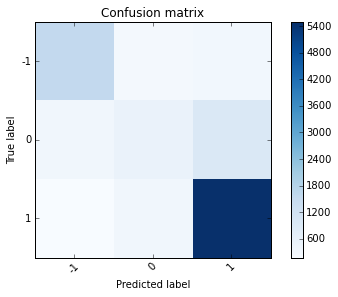

time: 294 ms


In [167]:
plot_confusion_matrix(cm)

In [165]:
cm_normalized

array([[ 0.72735761,  0.1232493 ,  0.14939309],
       [ 0.19042437,  0.28563656,  0.52393906],
       [ 0.02873754,  0.05747508,  0.91378738]])

time: 2.46 ms


In [163]:
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

time: 1.1 ms


/Users/Will/anaconda/envs/py34/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


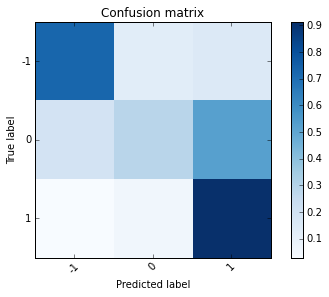

time: 238 ms


In [166]:
plot_confusion_matrix(cm_normalized)

http://arxiv.org/pdf/1509.02437.pdf

In [175]:
from sklearn.externals import joblib
joblib.dump(model, '../model/svm.pkl')

time: 3.32 ms


['../model/svm.pkl',
 '../model/svm.pkl_01.npy',
 '../model/svm.pkl_02.npy',
 '../model/svm.pkl_03.npy']

time: 54.5 ms


In [178]:
from sklearn.linear_model import RidgeClassifier

time: 854 µs


In [ ]:
RidgeClassifierCV